<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M2_AST_07_Catboost_XGBoost_LightGBM_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Assignment: Catboost, XGBoost and LightGBM

## Learning Objectives
At the end of the experiment, you will be able to :

* perform data preprocessing
* perform feature transformation
* implement CatBoost, XGBoost and LightGBM model to perform classification using Lending Club dataset

## Introduction

**XGBoost** was originally produced by University of Washington researchers and is maintained by open-source contributors. XGBoost is available in Python, R, Java, Ruby, Swift, Julia, C, and C++. Similar to LightGBM, XGBoost uses the gradients of different cuts to select the next cut, but XGBoost also uses the hessian, or second derivative, in its ranking of cuts. Computing this next derivative comes at a slight cost, but it also allows a greater estimation of the cut to use.

**CatBoost** is developed and maintained by the Russian search engine Yandex and is available in Python, R, C++, Java, and also Rust. CatBoost distinguishes itself from LightGBM and XGBoost by focusing on optimizing decision trees for categorical variables, or variables whose different values may have no relation with each other (eg. apples and oranges).

**LightGBM** is a boosting technique and framework developed by Microsoft. The framework implements the LightGBM algorithm and is available in Python, R, and C. LightGBM is unique in that it can construct trees using Gradient-Based One-Sided Sampling, or GOSS for short.

To know more on comparisons between CatBoost, XgBoost and LightGBM, refer below
- [Article 1](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db)
- [Article 2](https://towardsdatascience.com/catboost-vs-lightgbm-vs-xgboost-c80f40662924)

## Dataset Description

Lending Club is a lending platform that lends money to people in need at an interest rate based on their credit history and other factors. We will analyze this data and pre-process it based on our need and build a machine learning model that can identify a potential defaulter based on his/her history of transactions with Lending Club. 

This dataset contains 42538 rows and 144 columns. **Out of these 144 columns, many columns have majorly null values.**

To know more about the Lending Club dataset features, refer [here](https://www.openintro.org/data/index.php?data=loans_full_schema).

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236624" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8240187807" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_AST_07_Catboost_XGBoost_LightGBM_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/LoanStats3a.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


###  Import required packages

In [4]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, metrics, cv
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [6]:
# Load the raw loan stats dataset
data = pd.read_csv("LoanStats3a.csv")
data.shape

(42538, 144)

## Data Preprocessing

In [7]:
# View the top 5 rows of data
pd.set_option('display.max_columns', None)

data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0

In [8]:
# Size of the dataset
data.shape

(42538, 144)

In [9]:
# Checking info of the raw dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


### Check for missing values in the dataset

In [10]:
# Check missing values
data.isnull().sum()

id                       42537
member_id                42538
loan_amnt                    3
funded_amnt                  3
funded_amnt_inv              3
                         ...  
settlement_status        42378
settlement_date          42378
settlement_amount        42378
settlement_percentage    42378
settlement_term          42378
Length: 144, dtype: int64

In [11]:
# Total percentage of null values in the data
pct = (data.isnull().sum().sum())/(data.shape[0]*data.shape[1])
print("Overall missing values in the data ≈ {:.2f} %".format(pct*100))

Overall missing values in the data ≈ 63.14 %


From above we can see that, about 63% of the values in the overall data are null values.

Let's visualize the null values using the heatmap.

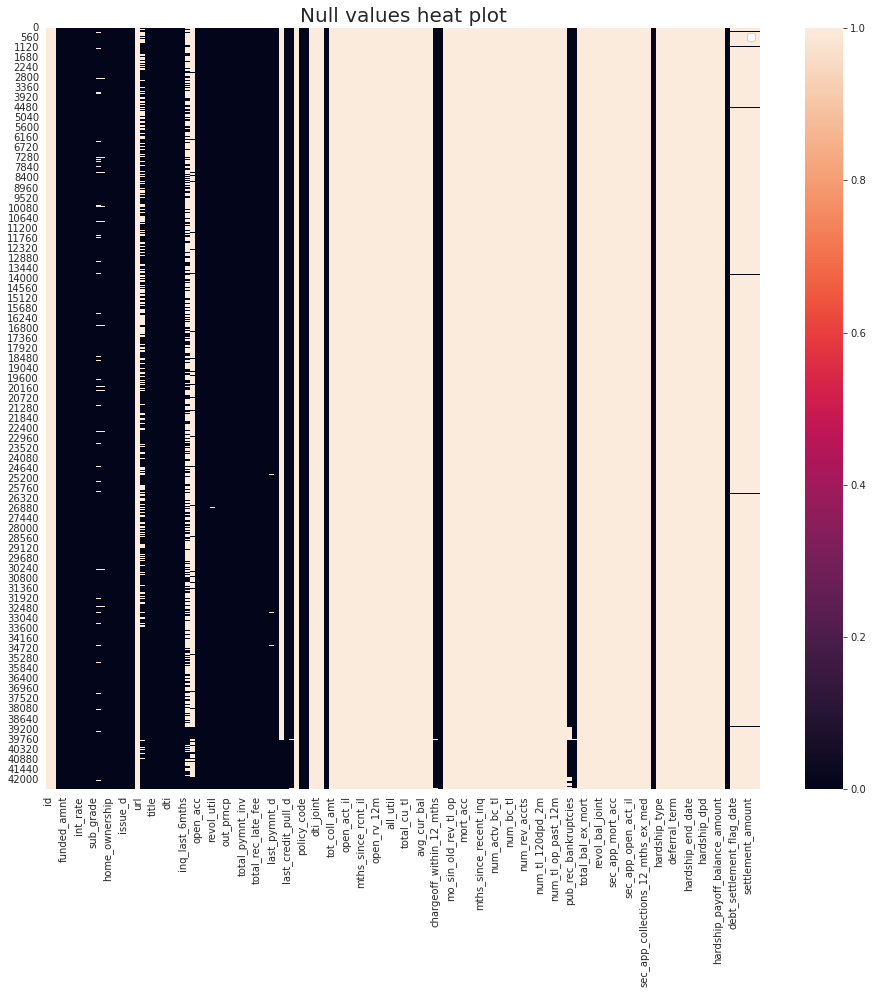

In [12]:
# Checking for null values using a heatmap as a visualizing tool
plt.figure(figsize=(16,14))
sns.heatmap(data.isnull())
plt.title('Null values heat plot', fontdict={'fontsize': 20})
plt.legend(data.isnull())
plt.show()

As we can see from the above heatmap, there are lot of null values in the dataset. We have to carefully deal with these null values.

### Handling missing values in the data

- Select columns having null values less than 40%

In [13]:
# Creating a dataframe to display percentage of null values in different number of columns
temp_df = pd.DataFrame()
temp_df['Percentage of null values'] = ['10% or less', '10% to 20%', '20% to 30%', '30% to 40%', '40% to 50%', 
                                        '50% to 60%', '60% to 70%', '70% to 80%', '80% to 90%', 'More than 90%']

# Store the columns count separately for each range
ten_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.1])
ten_to_twenty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.2] & data.columns[((data.isnull().sum())/len(data)) > 0.1])
twenty_to_thirty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.3] & data.columns[((data.isnull().sum())/len(data)) > 0.2])
thirty_to_forty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.4] & data.columns[((data.isnull().sum())/len(data)) > 0.3])
forty_to_fifty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.5] & data.columns[((data.isnull().sum())/len(data)) > 0.4])
fifty_to_sixty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.6] & data.columns[((data.isnull().sum())/len(data)) > 0.5])
sixty_to_seventy_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.7] & data.columns[((data.isnull().sum())/len(data)) > 0.6])
seventy_to_eighty_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.8] & data.columns[((data.isnull().sum())/len(data)) > 0.7])
eighty_to_ninety_percent = len(data.columns[((data.isnull().sum())/len(data)) <= 0.9] & data.columns[((data.isnull().sum())/len(data)) > 0.8])
hundred_percent = len(data.columns[((data.isnull().sum())/len(data)) > 0.9])

temp_df['No. of columns'] = [ten_percent, ten_to_twenty_percent, twenty_to_thirty_percent, thirty_to_forty_percent, forty_to_fifty_percent, 
                             fifty_to_sixty_percent, sixty_to_seventy_percent, seventy_to_eighty_percent, eighty_to_ninety_percent, hundred_percent]
temp_df

,Percentage of null values,No. of columns
0,10% or less,52
1,10% to 20%,0
2,20% to 30%,0
3,30% to 40%,1
4,40% to 50%,0
5,50% to 60%,0
6,60% to 70%,1
7,70% to 80%,0
8,80% to 90%,0
9,More than 90%,90


From the above results, we can see that there are only 53 columns out of 144 columns that have null values less than 40%.

In [14]:
# Considering only those columns which have null values less than 40% in that particular column
df1 = data[data.columns[((data.isnull().sum())/len(data)) < 0.4]]
df1.shape

(42538, 53)

By considering columns with less number of null values, we were able to decrease total number of columns from 144 to 53.

Note that we will deal with null values present in these selected 53 columns later below.

### Removing columns having single distinct value

In [15]:
# Checking columns that have only single values in them i.e, constant columns
const_cols = []
for i in df1.columns:
    if df1[i].nunique() == 1:
        const_cols.append(i)

print(const_cols)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'chargeoff_within_12_mths', 'hardship_flag']


In [16]:
# After observing the above output, we are dropping columns which have single values in them
print("Shape before:", df1.shape)
df1.drop(const_cols, axis=1, inplace = True)
print("Shape after:", df1.shape)

Shape before: (42538, 53)
Shape after: (42538, 44)


### Extract features from datetime columns

In [17]:
# Columns other than numerical value
colms = df1.columns[df1.dtypes == 'object']
colms

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'debt_settlement_flag'],
      dtype='object')

In [18]:
# Check which columns needs to be converted to datetime
df1[colms].head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,debt_settlement_flag
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-19,N
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Oct-16,N


In [19]:
# Converting objects to datetime columns
dt_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for i in dt_cols:
    df1[i] = pd.to_datetime(df1[i].astype('str'), format='%b-%y', yearfirst=False)

In [20]:
# Checking the new datetime columns
df1[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2019-05-01
1,2011-12-01,1999-04-01,2013-04-01,2016-10-01
2,2011-12-01,2001-11-01,2014-06-01,2017-06-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2017-01-01,2018-04-01


In [21]:
# Considering only year of joining for 'earliest_cr_line' column
df1['earliest_cr_line'] = pd.DatetimeIndex(df1['earliest_cr_line']).year

In [22]:
# Adding new features by getting month and year from [issue_d, last_pymnt_d, and last_credit_pull_d] columns
df1['issue_d_year'] = pd.DatetimeIndex(df1['issue_d']).year  
df1['issue_d_month'] = pd.DatetimeIndex(df1['issue_d']).month  
df1['last_pymnt_d_year'] = pd.DatetimeIndex(df1['last_pymnt_d']).year  
df1['last_pymnt_d_month'] = pd.DatetimeIndex(df1['last_pymnt_d']).month 
df1['last_credit_pull_d_year'] = pd.DatetimeIndex(df1['last_credit_pull_d']).year  
df1['last_credit_pull_d_month'] = pd.DatetimeIndex(df1['last_credit_pull_d']).month 

In [23]:
# Feature extraction
df1.earliest_cr_line = 2019 - (df1.earliest_cr_line)
df1.issue_d_year = 2019 - (df1.issue_d_year)
df1.last_pymnt_d_year = 2019 - (df1.last_pymnt_d_year)
df1.last_credit_pull_d_year = 2019 - (df1.last_credit_pull_d_year)

In [24]:
# Dropping the original features to avoid data redundancy
df1.drop(['issue_d','last_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)
df1.shape

(42538, 47)

### Check for missing values in reduced dataset

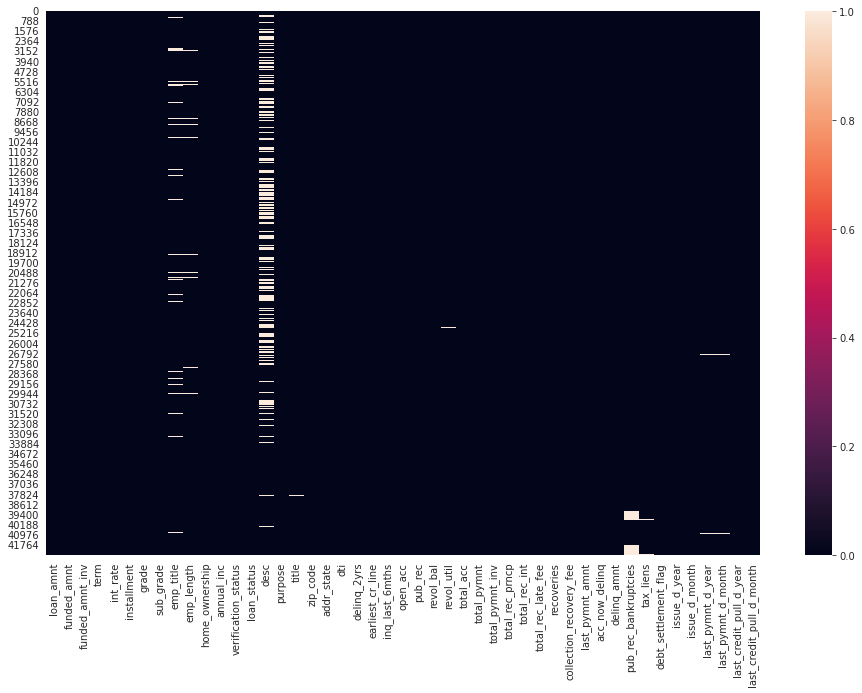

In [25]:
# Checking for null values in the updated dataframe
plt.figure(figsize=(16,10))
sns.heatmap(df1.isnull())
plt.show()

### Handling Null values in reduced dataset

In [26]:
# Checking for Percentage of null values
a = (df1.isnull().sum() / df1.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=False)

,Percentage of null values
desc,31.256759
emp_title,6.180356
pub_rec_bankruptcies,3.215948
emp_length,2.621186
tax_liens,0.253891
revol_util,0.218628
last_pymnt_d_month,0.202172
last_pymnt_d_year,0.202172
total_acc,0.075227
inq_last_6mths,0.075227


In [27]:
# Dropping the 29 rows which have null values in few columns
df1 = df1[df1['delinq_2yrs'].notnull()]
df1.shape

(42506, 47)

In [28]:
# Checking again for Percentage of null values
a = (df1.isnull().sum() / df1.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=False)

,Percentage of null values
desc,31.270879
emp_title,6.149720
pub_rec_bankruptcies,3.143086
emp_length,2.616101
last_pymnt_d_year,0.195267
last_pymnt_d_month,0.195267
tax_liens,0.178798
revol_util,0.143509
title,0.030584
last_credit_pull_d_year,0.007058


Now, imputing the missing values with the median value for columns **'last_pymnt_d_year', 'last_pymnt_d_month', 'last_credit_pull_d_year', 'last_credit_pull_d_month', 'tax_liens'** as null values in these columns are less than 0.5% of the size.

In [29]:
# Imputing the null values with the median value
df1['last_pymnt_d_year'].fillna(df1['last_pymnt_d_year'].median(), inplace=True)
df1['last_pymnt_d_month'].fillna(df1['last_pymnt_d_month'].median(), inplace=True)
df1['last_credit_pull_d_year'].fillna(df1['last_credit_pull_d_year'].median(), inplace=True)
df1['last_credit_pull_d_month'].fillna(df1['last_credit_pull_d_month'].median(), inplace=True)
df1['tax_liens'].fillna(df1['tax_liens'].median(), inplace=True)

For **'revol_util'** column, filling null values with median(string) which is close to 50:

In [30]:
# For 'revol_util' column, fill null values with 50%
df1.revol_util.fillna('50%', inplace=True)  

# Extracting numerical value from string
df1.revol_util = df1.revol_util.apply(lambda x: x[:-1])

# Converting string to float
df1.revol_util = df1.revol_util.astype('float')

In [31]:
# Unique values in 'pub_rec_bankruptcies' column
df1.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

From the above we can see that the **'pub_rec_bankruptcies'** column is highly imbalanced. So, it is better to fill it with median(0) value as even after building model the model will be skewed very much towards 0.

In [32]:
# Fill 'pub_rec_bankruptcies' column
df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].median(), inplace=True)

In [33]:
# Unique values in 'emp_length' column
df1['emp_length'].value_counts()

10+ years    9366
< 1 year     5044
2 years      4742
3 years      4362
4 years      3649
1 year       3592
5 years      3458
6 years      2374
7 years      1875
8 years      1592
9 years      1340
Name: emp_length, dtype: int64

In [34]:
# Seperating null values by assigning a random string
df1['emp_length'].fillna('5000',inplace=True) 

# Filling '< 1 year' as '0 years' of experience and '10+ years' as '10 years'
df1.emp_length.replace({'10+ years':'10 years', '< 1 year':'0 years'}, inplace=True)

# Then extract numerical value from the string
df1.emp_length = df1.emp_length.apply(lambda x: x[:2])

# Converting it's dattype to float
df1.emp_length = df1.emp_length.astype('float')

In [35]:
# Checking again for Percentage of null values
a = (df1.isnull().sum() / df1.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=False)

,Percentage of null values
desc,31.270879
emp_title,6.149720
title,0.030584


In [36]:
# Removing redundant features and features which have percentage null values > 5%
df1.drop(['desc', 'emp_title', 'title'], axis = 1, inplace = True)
df1.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
acc_now_de

### Converting categorical columns to numerical columns


In [37]:
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N,8.0,12.0,4.0,1.0,0.0,5.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,0.0,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N,8.0,12.0,6.0,4.0,3.0,10.0


In [38]:
# Unique values in 'term' column
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [39]:
# Unique values in 'int_rate' column
df1['int_rate'].unique()[:5]

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%'], dtype=object)

In [40]:
# Converting 'term' and 'int_rate' to numerical columns
df1.term = df1.term.apply(lambda x: x[1:3])
df1.term = df1.term.astype('float')
df1.int_rate = df1.int_rate.apply(lambda x: x[:2])
df1.int_rate = df1.int_rate.astype('float')
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,36.0,10.0,162.87,B,B2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N,8.0,12.0,4.0,1.0,0.0,5.0
1,2500.0,2500.0,2500.0,60.0,15.0,59.83,C,C4,0.0,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N,8.0,12.0,6.0,4.0,3.0,10.0


Among the address related features, considering **'addr_state'** column and excluding **'zip_code'** column.

In [41]:
df2 = df1.drop('zip_code', axis = 1)

In [42]:
# One hot encoding on categorical columns
df2 = pd.get_dummies(df2, columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'debt_settlement_flag'], drop_first = True)
df2.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
0,5000.0,5000.0,4975.0,36.0,10.0,162.87,B,B2,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,171.62,0.0,0.0,0.0,0.0,8.0,12.0,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,15.0,59.83,C,C4,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,119.66,0.0,0.0,0.0,0.0,8.0,12.0,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Label encoding on 'grade' column
le = LabelEncoder()
le.fit(df2.grade)
print(le.classes_)

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [44]:
# Update 'grade' column
df2.grade = le.transform(df2.grade)

In [45]:
# Label encoding on 'sub_grade' column
le2 = LabelEncoder()
le2.fit(df2.sub_grade)
le2.classes_

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [46]:
# Update 'sub_grade' column
df2.sub_grade = le2.transform(df2.sub_grade)

In [48]:
df2.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
0,5000.0,5000.0,4975.0,36.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,171.62,0.0,0.0,0.0,0.0,8.0,12.0,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,119.66,0.0,0.0,0.0,0.0,8.0,12.0,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# Target feature
df2['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [50]:
# Prediction features
X = df2.drop("loan_status", axis = 1)
# Target variable
y = df2['loan_status'] 
y.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1962
Does not meet the credit policy. Status:Charged Off      758
Name: loan_status, dtype: int64

In [51]:
# Label encoding the target variable
le3 = LabelEncoder()
le3.fit(y)
y_transformed = le3.transform(y)
y_transformed

array([3, 0, 3, ..., 2, 2, 2])

In [52]:
X.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
0,5000.0,5000.0,4975.0,36.0,10.0,162.87,1,6,10.0,24000.0,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,171.62,0.0,0.0,0.0,0.0,8.0,12.0,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,15.0,59.83,2,13,0.0,30000.0,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,119.66,0.0,0.0,0.0,0.0,8.0,12.0,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split data into training and testing set

In [53]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.20, stratify = y_transformed, random_state = 2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((34004, 106), (34004,), (8502, 106), (8502,))

## Model Building

In [54]:
# Using DecisionTree as base model
giniDecisionTree = DecisionTreeClassifier(criterion='gini', random_state = 100, 
                                          max_depth=3, class_weight = 'balanced', min_samples_leaf = 5)
giniDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [55]:
# Prediciton using DecisionTree
giniPred = giniDecisionTree.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, giniPred))

Accuracy Score:  0.9426017407668784


### CatBoost

In [56]:
# Create CatBoostClassifier object
CatBoost_clf = CatBoostClassifier(iterations=5,
                                  learning_rate=0.1,
                                  #loss_function='CrossEntropy'
                                  )

In [57]:
#cat_features = list(range(0, X.shape[1]))
CatBoost_clf.fit(x_train, y_train,
                 #cat_features=cat_features,
                 eval_set = (x_test, y_test),
                 verbose = False)

In [58]:
# Prediction using CatBoost
cbr_prediction = CatBoost_clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, cbr_prediction))

Accuracy Score:  0.9704775346977181


In [59]:
#  Classification report for CatBoost model
print('Classification Report for CatBoost:')
print(classification_report(y_test, cbr_prediction))

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1134
           1       0.83      0.72      0.77       152
           2       0.84      0.68      0.75       392
           3       0.98      0.99      0.99      6824

    accuracy                           0.97      8502
   macro avg       0.90      0.84      0.87      8502
weighted avg       0.97      0.97      0.97      8502



### XGBoost

In [60]:
# Create XGBClassifier object
XGB_clf = XGBClassifier(learning_rate = 0.1)

In [61]:
# Fit on training set
XGB_clf.fit(x_train, y_train,
            eval_set = [(x_train, y_train), (x_test, y_test)],
            verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [62]:
# Prediction using XGBClassifier
XGB_prediction = XGB_clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, XGB_prediction))

Accuracy Score:  0.989061397318278


In [63]:
# Classification report for XGBoost

print('Classification Report for XGBoost:')
print(classification_report(y_test, XGB_prediction))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1134
           1       0.93      0.91      0.92       152
           2       0.93      0.90      0.91       392
           3       0.99      1.00      0.99      6824

    accuracy                           0.99      8502
   macro avg       0.96      0.95      0.95      8502
weighted avg       0.99      0.99      0.99      8502



### LightGBM

In [64]:
# Create LGBMClassifier object
LGBM_clf = LGBMClassifier(learning_rate = 0.1)

In [65]:
# Fit on training set
LGBM_clf.fit(x_train, y_train,
             eval_set = [(x_train, y_train), (x_test, y_test)],
             verbose = False)

LGBMClassifier()

In [66]:
# Prediction using LGBMClassifier
LGBM_prediction = LGBM_clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, LGBM_prediction))

Accuracy Score:  0.9905904493060457


In [67]:
# Classification report for LGBM

print('Classification Report for LGBM:')
print(classification_report(y_test, LGBM_prediction))

Classification Report for LGBM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1134
           1       0.94      0.92      0.93       152
           2       0.94      0.92      0.93       392
           3       0.99      1.00      1.00      6824

    accuracy                           0.99      8502
   macro avg       0.97      0.96      0.96      8502
weighted avg       0.99      0.99      0.99      8502



## Reference Reading:

https://neptune.ai/blog/when-to-choose-catboost-over-xgboost-or-lightgbm

### Please answer the questions below to complete the experiment:




In [68]:
#@title Select the FALSE statement: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest" #@param ["", "CatBoost can internally handle categorical variables in the data", "XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest", "LightGBM uses a histogram-based method for selecting the best split in order to speed up the training process", "All the above", "None of the above"]

In [69]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [70]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Perfect for practice" #@param {type:"string"}


In [71]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [72]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [73]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [74]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3705
Date of submission:  12 Mar 2023
Time of submission:  19:04:40
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
